## keras image application - Ensemble 학습

In [3]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet import ResNet101

In [4]:
from google.colab import files
up = files.upload()

Saving animals.zip to animals.zip


In [5]:
!unzip animals.zip -d animals > /dev/null

In [6]:
up = files.upload()

Saving image_util.py to image_util.py


In [13]:
from PIL import Image
import os
import matplotlib.pyplot as plt

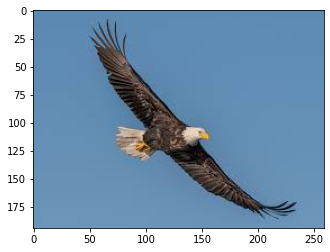

In [20]:
animal_dir = '/content/animals/'

animals = os.listdir('/content/animals/')
img_path = animal_dir+animals[1]
img = Image.open(img_path)
plt.imshow(img);

In [21]:
vgg16 = VGG16()
vgg19 = VGG19()
resnet50 = ResNet50()
resnet101 = ResNet101()

179658752/179648224 [==============================] - 1s 0us/step


- 이미지 예측

In [22]:
import numpy as np
from glob import glob
from image_util import center_image

In [25]:
lines = []

for fname in glob('animals/*.jpg'):
    name = fname.split('/')[1].split('.')[0]
    img = center_image(Image.open(fname), src_format='Pillow')
    yhat_v16 = vgg16.predict(img.reshape(1,224,224,3))
    yhat_v19 = vgg19.predict(img.reshape(1,224,224,3))
    yhat_r50 = resnet50.predict(img.reshape(1,224,224,3))
    yhat_r101 = resnet101.predict(img.reshape(1,224,224,3))

    yhat_ens = (yhat_v16 + yhat_v19 + yhat_r50 + yhat_r101) / 4.

    pred_v16 = decode_predictions(yhat_v16)[0][0][1]
    pred_v19 = decode_predictions(yhat_v19)[0][0][1]
    pred_r50 = decode_predictions(yhat_r50)[0][0][1]
    pred_r101 = decode_predictions(yhat_r101)[0][0][1]
    pred_ens = decode_predictions(yhat_ens)[0][0][1]

    lines.append([name, pred_v16, pred_v19, pred_r50, pred_r101, pred_ens])


49152/35363 [=========================================] - 0s 0us/step


- 결과 확인

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

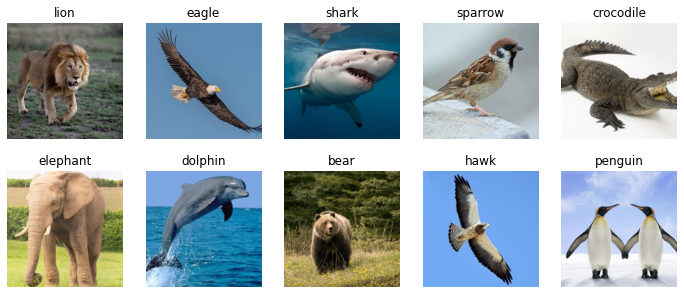

In [27]:
plt.figure(figsize=(12,5))

for i, fname in enumerate(glob('animals/*.jpg')):
    plt.subplot(2,5,i+1)
    plt.imshow(center_image(Image.open(fname),
                            src_format='Pillow', dst_format='Pillow'))
    plt.title(fname.split('/')[1].split('.')[0])
    plt.axis('off')

plt.show()

In [28]:
df = pd.DataFrame(lines,
                  columns=['Name', 'VGG16', 'VGG19', 'ResNet50', 'ResNet101', 'Ensemble'])

In [30]:
df

,Name,VGG16,VGG19,ResNet50,ResNet101,Ensemble
0,lion,lion,lion,lion,lion,lion
1,eagle,kite,kite,kite,kite,kite
2,shark,great_white_shark,great_white_shark,great_white_shark,great_white_shark,great_white_shark
3,sparrow,quail,jay,chickadee,jay,jay
4,crocodile,agama,American_alligator,American_alligator,American_alligator,American_alligator
5,elephant,African_elephant,African_elephant,African_elephant,African_elephant,African_elephant
6,dolphin,dugong,hammerhead,hammerhead,hammerhead,hammerhead
7,bear,brown_bear,ice_bear,ice_bear,brown_bear,ice_bear
8,hawk,kite,kite,screw,kite,kite
9,penguin,king_penguin,king_penguin,king_penguin,king_penguin,king_penguin
